In [1]:
using PGFPlots

In [34]:
struct Point
    iter::Int
    val::Float64
end

train = Point[]
test = Point[]

lines = readlines("../data/train_risk_estimator_out.txt")
for line in lines
    if ismatch(r"TRAIN iter=\d+ obj_val=", line) # TRAIN iter=000100 obj_val=0.04917024
        iter = parse(Int, match(r"(?<=iter=)\d+", line).match)
        val = parse(Float64, match(r"(?<=obj_val=)\d+\.\d+", line).match)
        push!(train, Point(iter,val))
    elseif ismatch(r"Performance on Validation Set after \d+ iterations", line)
        iter = parse(Int, match(r"(?<=after )\d+", line).match)
        push!(test, Point(iter, NaN))
    elseif ismatch(r"Square-loss \(avg over \d+\) =", line) # Square-loss (avg over 150016) = 0.0842
        val = parse(Float64, match(r"(?<=\) = )\d+\.\d+", line).match)
        test[end] = Point(test[end].iter, val)
    end
end

"done"

"done"

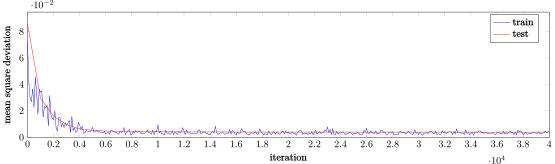

In [35]:
Axis([
    Plots.Linear([x.iter for x in train], [x.val for x in train], style="solid, blue, mark=none", legendentry="train"),
    Plots.Linear([x.iter for x in test ], [x.val for x in test ], style="solid, red,  mark=none", legendentry="test"),
    ],
    xlabel="iteration",
    ylabel="mean square deviation",
    width="20cm", height="6cm",
    style="enlarge x limits=0",
    ymin=0
)